
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [8]:
import math
import io 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import scipy.spatial
poll = pd.read_csv('poll-larger.csv')

In [9]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
vote    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


In [10]:
poll['vote'].value_counts(normalize = True)

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64

In [11]:
def sample(OrgeronWinPercent, n = 10000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < OrgeronWinPercent,'Orgeron','Saban')})

In [12]:
s = sample(0.5181, n = 10000)

In [13]:
s['vote'].value_counts(normalize = True)

Orgeron    0.5252
Saban      0.4748
Name: vote, dtype: float64

In [14]:
res = s['vote'].value_counts(normalize = True)
type(res)

pandas.core.series.Series

In [15]:
distDF = pd.DataFrame([sample(0.5181)['vote'].value_counts(normalize = True) for i in range(10000)])
distDF.head()

,Orgeron,Saban
vote,0.5238,0.4762
vote,0.5209,0.4791
vote,0.5178,0.4822
vote,0.5224,0.4776
vote,0.5286,0.4714


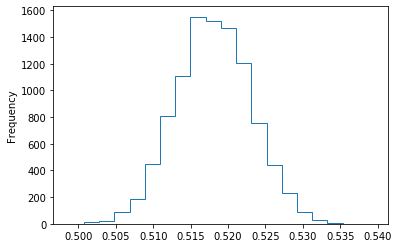

In [16]:
distDF['Orgeron'].plot(kind = 'hist',histtype = 'step',bins = 20)

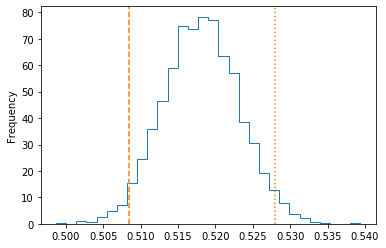

In [18]:
distDF['Orgeron'].plot(kind = 'hist',histtype = 'step', bins = 30, density = True)
plt.axvline(distDF['Orgeron'].quantile(0.025), c = 'C1', linestyle = '--')
plt.axvline(distDF['Orgeron'].quantile(0.975), c = 'C1', linestyle = ':')

In [19]:
def samplingdist(orgeronWinPercent, n = 10000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize = True) for i in range(10000)])

In [20]:
def quantiles(orgeronWinPercent,n = 10000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025),distDF['Orgeron'].quantile(0.975)

In [22]:
quantiles(0.51)

(0.5002, 0.5199025)